In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pairinteraction as pi  # use `import pairinteraction.real as pi` for better performance
from pairinteraction.visualization.colormaps import alphamagma

if pi.Database.get_global_database() is None:
    
    pi.Database.initialize_global_database(download_missing=True)

In [12]:
ns = np.arange(60,80,2)

Rb_c3s = []
Cs_c3s = []

V_Rb = []
V_Cs = []

for n in ns:
    ket1 = pi.KetAtom("Rb", n, l=0, j=0.5, m=0.5)
    ket2 = pi.KetAtom("Cs", n-1, l=1, j=1/2, m=1/2)

    c3_obj = pi.C3(ket1, ket2)
    # c3_obj.set_distance_vector([0, 0, 7], unit = 'micrometers')
    # c3_obj.set_diamagnetism_enabled(True)
    # c3_obj.set_magnetic_field([0, 0, 6.65], "gauss")
    c3_obj.check_for_resonances(required_overlap=0.9)
    # c3_obj.set_interaction_order(3)
    c3 = c3_obj.get("MHz um^3")
    Rb_c3s.append(c3)
    V_Rb.append(c3/(117649))

ValueError: All kets for atom=0 must have the same species

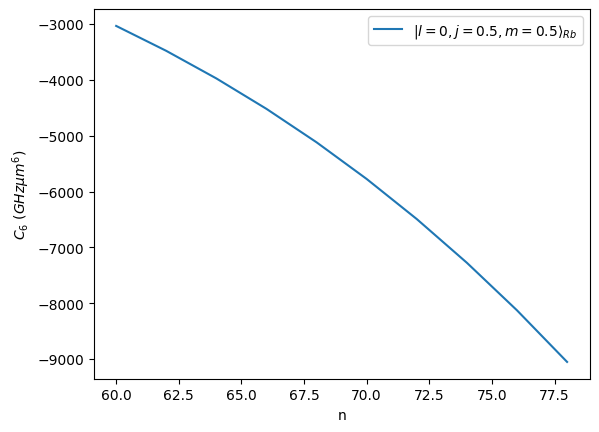

In [11]:
plt.figure()
plt.plot(ns,Rb_c3s, label = r'$|l=0, j=0.5, m=0.5 \rangle_{Rb} $')
plt.legend()
plt.ylabel('$C_6$ $(GHz \mu m^6)$')
plt.xlabel('n')
plt.show()